# Machine Learning con Python
## Scikit Learn - Regresión Polinomial

[Link Video - Teoría](https://www.youtube.com/watch?v=bvQenoLWZfc&list=PLJjOveEiVE4Dk48EI7I-67PEleEC5nxc3&index=20)


[Link Video](https://www.youtube.com/watch?v=lnilw1y6n2o&list=PLJjOveEiVE4Dk48EI7I-67PEleEC5nxc3&index=21)

[Documentación](https://scikit-learn.org/0.21/index.html)

## Importar librerías

In [158]:
# Importar librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model

## Carga de Data

In [159]:
#Cargar Dataset
boston = datasets.load_boston()

## Entender la Data

In [160]:
# Verificar la información contenida en el dataset:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [161]:
# Verificar las caracteristicas del dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [162]:
# Verificar la cantidad de datos en el dataset
print("La cantidad de datos es:")
print(boston.data.shape)

La cantidad de datos es:
(506, 13)


In [163]:
# Verificar la información de las columnas:
print("Nombres de columnas:")
print(boston.feature_names)

Nombres de columnas:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Preparar la data para la Regresión Polinomial

In [164]:
# Seleccionamos la data de la columna 6 
X_p = boston.data[:,np.newaxis, 5]

In [165]:
# Defino los datos correspondientes a las etiquetas
y_p = boston.target

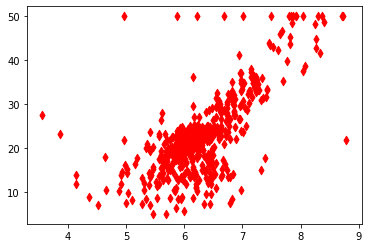

In [166]:
# Graficamos los datos correspondientes
plt.scatter(X_p,y_p, marker = "d", color = "r")
plt.show()

## Implementación de la Regresión Polinomial


In [167]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
from sklearn.model_selection import train_test_split
X_train_p, X_test_p, y_train_p,y_test_p = train_test_split(X_p, y_p, test_size = 0.2 )

In [168]:
#Se define el grado del polinomio
from sklearn.preprocessing import PolynomialFeatures
poli_reg = PolynomialFeatures(degree = 2)

In [169]:
# Se transforman la caracteristicas existente en caracteristicas de mayor grado
X_train_poli = poli_reg.fit_transform(X_train_p)
X_test_poli = poli_reg.fit_transform(X_test_p)

In [170]:
#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()

In [171]:
#Entreno el modelo
pr.fit(X_train_poli, y_train_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)

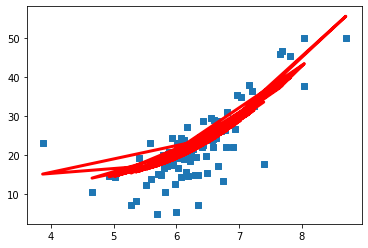

In [173]:
#Graficamos los datos junto al modelo de prueba
plt.scatter(X_test_p, y_test_p, marker="s")
plt.plot(X_test_p, Y_pred_pr, color = "r", linewidth = 3)
plt.show()

## Datos del Modelo de Regresión Polinomial


In [174]:
print("El valor de la pendiente o del coeficiente 'a' es:")
print()
print(pr.coef_)

El valor de la pendiente o del coeficiente 'a' es:

[  0.         -21.5641549    2.37953511]


In [175]:
print("El valor de la intersección o del coeficiente 'b' es:")
print()
print(pr.intercept_)

El valor de la intersección o del coeficiente 'b' es:

62.96702037878764


In [176]:
print("Precisión del modelo es:")
print()
print(pr.score(X_train_poli, y_train_p))

Precisión del modelo es:

0.522947727240605
